# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
# Import Required Packages.
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt
import warnings
warnings.filterwarnings("ignore")

###  **Dataset Exploration**

In [75]:
# pd.set_option('display.float_format',  '{:,.2f}'.format)
data_path = '/content/drive/MyDrive/Netflix_Movies_Tv_Shows/Netflixdata.csv'
netflixdf = pd.read_csv(data_path)

In [76]:
# Shape of dataset 
print(f'The total number of rows are {netflixdf.shape[0]}.')
print(f'The total number of columns are {netflixdf.shape[1]}.')

The total number of rows are 7787.
The total number of columns are 12.


In [77]:
# Column names
print(netflixdf.columns)

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


In [78]:
# Informatio about dataset. 
netflixdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [79]:
# First 5 rows of dataset
netflixdf.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [80]:
# Last 5 rows of dataset
netflixdf.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [81]:
# Checking null values 
print(f'Null count of values by column wise.')
print('*'*40)
netflixdf.isnull().sum()

Null count of values by column wise.
****************************************


show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [82]:
# Checking missing values in each column %
missing_val_count_by_column = netflixdf.isnull().sum()/len(netflixdf)
print((missing_val_count_by_column * 100 ).sort_values(ascending=False))

director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
rating           0.089893
show_id          0.000000
type             0.000000
title            0.000000
release_year     0.000000
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64


### **Data Wrangling**

In [93]:
# Changing dtypes for date columns
netflixdf['date_added']=pd.to_datetime(netflixdf['date_added'])
# netflixdf['release_year']=pd.to_datetime(netflixdf['release_year'])

In [94]:
# create new features for analysis using date_added col
netflixdf['year_added'] = netflixdf['date_added'].dt.year
netflixdf['month_added']=netflixdf['date_added'].dt.month
netflixdf['month_name_added']=netflixdf['date_added'].dt.month_name()

In [95]:
# Filled missing values from director and cast column
netflixdf['director'] = netflixdf['director'].replace(np.nan, 'No Data')
netflixdf['cast'] = netflixdf['cast'].replace(np.nan, 'No Data')

In [96]:
# Dropped missing values from Country, date added and rating
netflixdf = netflixdf.dropna(subset=['country', 'date_added', 'rating'])

In [97]:
# Country column has mutiple countries for each movie/tv show
netflixdf['country'].unique()[:50]

array(['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey',
       'Egypt', 'India', 'Poland, United States', 'Thailand', 'Nigeria',
       'Norway, Iceland, United States', 'United Kingdom', 'Japan',
       'South Korea', 'Italy', 'Canada', 'Indonesia', 'Romania', 'Spain',
       'Iceland', 'South Africa, Nigeria', 'France',
       'United States, South Africa', 'Portugal, Spain',
       'Hong Kong, China, Singapore', 'United States, Germany',
       'South Africa, China, United States', 'Argentina',
       'United States, France, Serbia', 'Germany',
       'Denmark, France, Poland', 'Poland', 'Kenya',
       'New Zealand, United Kingdom', 'Pakistan', 'Australia',
       'Australia, United States', 'Mexico, United States',
       'United States, China', 'China, Hong Kong', 'Taiwan',
       'United States, United Kingdom', 'France, South Korea, Japan',
       'United States, Canada', 'United Kingdom, United States',
       'Netherlands, Denmark, South Africa', 'Canada, United St

In [98]:
# Extracting only first country
netflixdf['country_col'] = netflixdf['country'].apply(lambda x: x.split(",")[0])

In [99]:
# Verifying null values
netflixdf.isnull().sum()

show_id             0
type                0
title               0
director            0
cast                0
country             0
date_added          0
release_year        0
rating              0
duration            0
listed_in           0
description         0
year_added          0
month_added         0
month_name_added    0
country_col         0
rating_col          0
dtype: int64

In [100]:
# Rating columns unique values
netflixdf['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [101]:
rating_info = {'TV-MA':'Adults', 
                'R':'Adults',
                'PG-13':'Teens',
                'TV-14':'Young Adults',
                'TV-PG':'Older Kids',
                'NR':'Adults',
                'TV-G':'Kids',
                'TV-Y':'Kids',
                'TV-Y7':'Older Kids',
                'PG':'Older Kids',
                'G':'Kids',
                'NC-17':'Adults',
                'TV-Y7-FV':'Older Kids',
                'UR':'Adults'}
netflixdf['rating_col'] = netflixdf['rating'].replace(rating_info)

In [102]:
# Maturity level wise rating for tv and movies 
netflixdf['rating_col'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

### **EDA**

In [103]:
netflixdf.head(1)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,month_name_added,country_col,rating_col
0,s1,TV Show,3%,No Data,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,August,Brazil,Adults


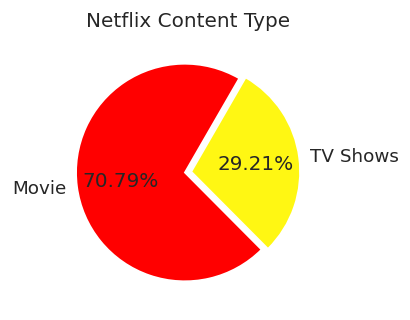

In [104]:
# sns.set(rc={"figure.dpi":120})
# sns.set_context('notebook')
labels=['Movie', 'TV Shows']
plt.pie(netflixdf['type'].value_counts(),labels=labels,explode=[0.03,0.03],
        autopct='%1.2f%%',colors=['#ff0000', '#fff713'], startangle=60)
plt.title('Netflix Content Type')
plt.show()

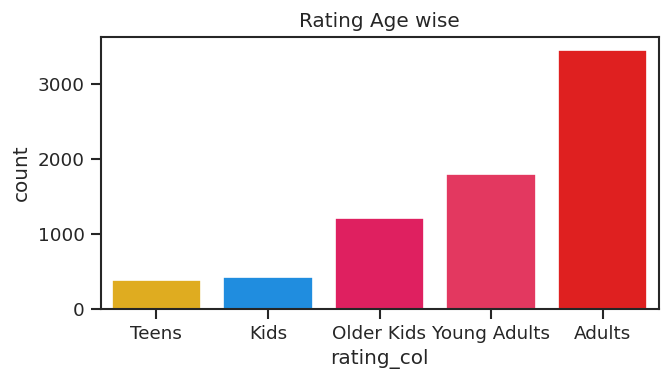

In [105]:
order = ['Teens', 'Kids', 'Older Kids', 'Young Adults', 'Adults']
sns.set_style("ticks")
sns.countplot(x="rating_col", data=netflixdf, order = order, palette = ['#ffbb00', '#0091ff', '#ff0055', '#ff1c51', '#ff0000'])
plt.title('Rating Age wise')
plt.show()

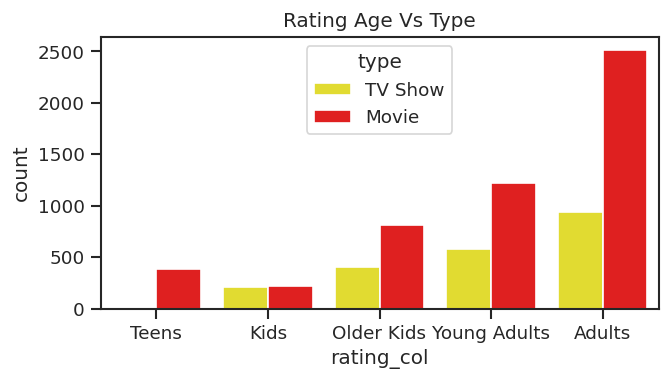

In [106]:
sns.set_style("ticks")
order = ['Teens', 'Kids', 'Older Kids', 'Young Adults', 'Adults']
sns.countplot(x="rating_col", hue = 'type', palette = ['#fff713', '#ff0000'], order = order, data=netflixdf)
plt.title('Rating Age Vs Type')
plt.show()